<a id="Title"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#50A20E; overflow:hidden"><b>Guava Disease Classification Using Convolutional Neural Networks</b></div>

<a id="description"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#50A20E; overflow:hidden"><b>Project Description</b></div>


<div style="padding: 20px; border-color: #50A20E; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #50A20E;">
    <p>
        This project demonstrates the classification of guava fruits into three categories—Anthracnose, Fruit Flies, and Healthy Fruits—using Convolutional Neural Networks (CNN). The goal is to detect and classify diseases that affect guavas, enabling better crop management and early intervention. The notebook covers data preprocessing, model architecture, training, and evaluation, offering a step-by-step guide to building an image classification model. This work highlights the power of deep learning in agricultural applications, contributing to the early identification of common guava diseases.
</p>
</div>


<a id="About"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#50A20E; overflow:hidden"><b>About Author</b></div>
 
 
<div style="padding: 20px; border-color: #50A20E; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #50A20E;">
    <p>
        I am <b>Atif Ali Khokhar</b>, a passionate data scientist dedicated to mastering machine learning techniques and continually expanding my knowledge base. I believe in the mantra of #KeepLearning and #KeepSupporting, as I am committed to constant growth and uplifting others in the field.
    </p>
    <div style="text-align: center;">
        <img src="https://media.licdn.com/dms/image/v2/D4D03AQEiSPQK_wGW3g/profile-displayphoto-shrink_800_800/profile-displayphoto-shrink_800_800/0/1710665268547?e=1740614400&v=beta&t=kWAOs-gKcO98CpT4fFoht9KnRMr_-ZAlo_cN0A-G9_U" alt="Profile Picture" style="width: 100px; height: 100px; border-radius: 50%; border: 2px solid #F1C40F;"><br>
    </div>
    <p>
        You can find more about me on my:<br>
        <a href="https://www.linkedin.com/in/atifalikhokhar/" target="_blank">LinkedIn</a>.<br>
        <a href="https://www.kaggle.com/atifaliak" target="_blank">Kaggle</a>.<br>
        Feel free to connect and reach out for any collaboration or queries!
    </p>
</div>

<a id="Contents"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#50A20E; overflow:hidden"><b> Table of Contents </b></div>


<div style="padding: 20px; border-color: #50A20E; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #50A20E;">

- <a href="#1">1. Importing Libraries</a>
    
- <a href="#2">2. Loading the Dataset</a> 

- <a href="#3">3. Image Visualizations</a>

- <a href="#4">4. Modeling</a>
    - <a href="#4.1">4.1. Model Architecture</a> 
    - <a href="#4.2">4.2. Model Summary</a>
    - <a href="#4.3">4.3. Model Compilation</a>
    - <a href="#4.4">4.4. Model Training</a>
     

- <a href="#5">5. Plotting Graphs for Accuracy and loss</a>
    - <a href="#5.1">5.1. Training Accuracy VS Validation Accuracy</a> 
    - <a href="#5.2">5.2. Training Loss VS Validation Loss</a>
    
</div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#50A20E; overflow:hidden"><b>1. Importing Libraries</b></div>

In [6]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory

import os
import random

import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#50A20E; overflow:hidden"><b>2. Loading the Dataset</b></div>

In [19]:
# Create the train dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory=r'/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=64,
    image_size=(256, 256)
)

# Create the validation dataset
test_ds = keras.utils.image_dataset_from_directory(
    directory=r'/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=64,
    image_size=(256, 256)
)


Found 2647 files belonging to 3 classes.
Found 755 files belonging to 3 classes.


<a id="3"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#50A20E; overflow:hidden"><b>3. Visualizing the Images</b></div>

In [8]:
def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [20]:
# Extrating the class labels
classes = train_ds.class_names

ANTHRACNOSE


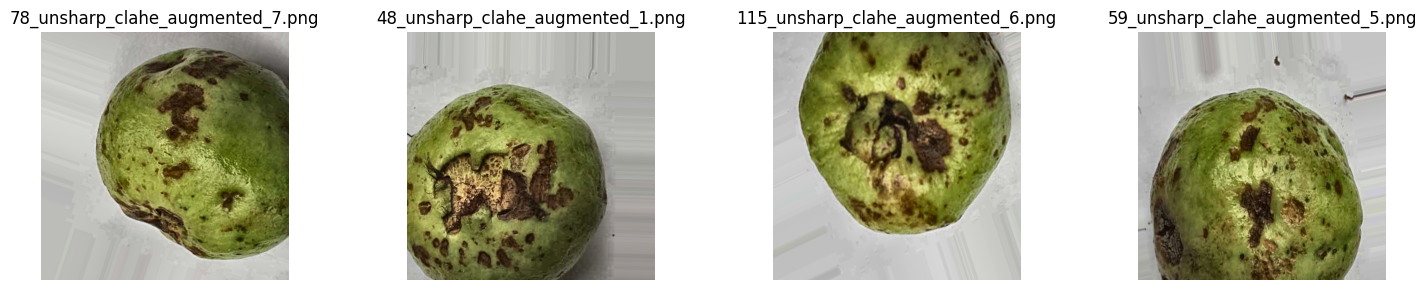

FRUIT_FLY


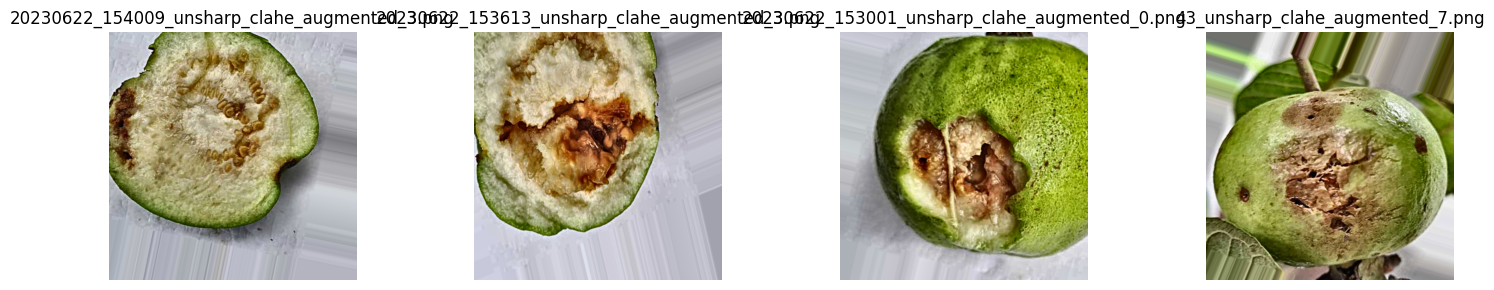

HEALTHY_GUAVA


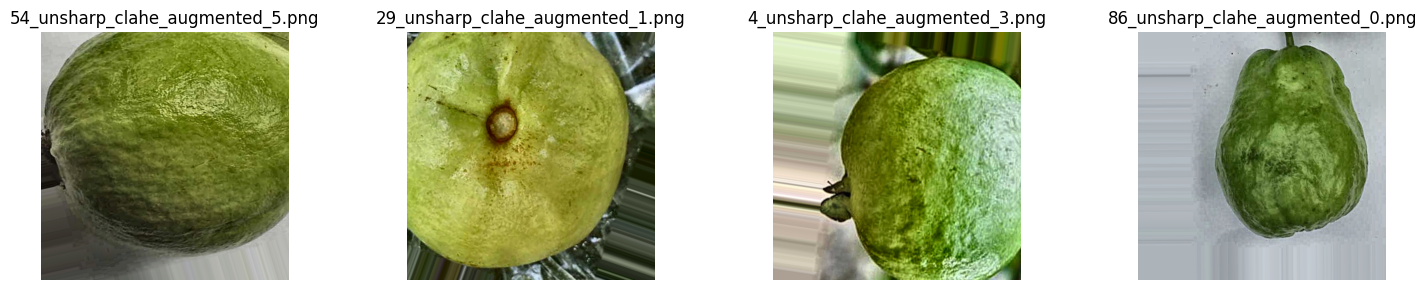

In [11]:
# Iterating through each class to plot its images
for label in classes:
    
    # Specify the path containing the images to visualize
    path_to_visualize = f"/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/train/{label}"

    # Visualize 3 random images
    print(label.upper())
    visualize_images(path_to_visualize, num_images=4)

<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#50A20E; overflow:hidden"><b>4. Modeling</b></div>

<a id="4.1"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#50A20E; overflow:hidden"><b>4.1. Building Model Architecture</b></div>

In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3, 3),activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64,kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(128,kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(3, activation='softmax'))

<a id="4.2"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#50A20E; overflow:hidden"><b>4.2. Model Summary</b></div>

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,849,539 (56.65 MB)

 Trainable params: 14,849,475 (56.65 MB)

 Non-trainable params: 64 (256.00 B)

<a id="4.3"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#50A20E; overflow:hidden"><b>4.3. Model Compilation</b></div>

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<a id="4.4"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#50A20E; overflow:hidden"><b>4.4. Training the Model</b></div>

In [15]:
history = model.fit(train_ds, epochs=10, batch_size = 128, validation_data=test_ds, verbose=1)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 625ms/step - accuracy: 0.4238 - loss: 3.3745 - val_accuracy: 0.3470 - val_loss: 3.1556
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - accuracy: 0.8641 - loss: 0.3369 - val_accuracy: 0.5099 - val_loss: 2.7263
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - accuracy: 0.9346 - loss: 0.1989 - val_accuracy: 0.7868 - val_loss: 0.5186
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - accuracy: 0.9274 - loss: 0.1890 - val_accuracy: 0.7815 - val_loss: 0.5584
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 236ms/step - accuracy: 0.9667 - loss: 0.0855 - val_accuracy: 0.8795 - val_loss: 0.3171
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 248ms/step - accuracy: 0.9810 - loss: 0.0468 - val_accuracy: 0.8808 - val_loss: 0.3120
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - accuracy: 0.9783 - loss: 0.0676 - val_accuracy: 0.7801 - val_loss: 0.7539
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - accuracy: 0.9944 - loss: 0.0232 - val_accu

Sur CPU le temps d execution est drastiquement grand ,le modele met 3240 s a s entrainer
En revanche le code s execute en 131 secondes sur gpu par une approche naive (on a rien apporter au code cote modification --->on a garde le meme code origine sauf qu on a forcer l execution sur GPU) 

In [31]:
import tensorflow as tf

# Configurer la gestion de la mémoire GPU avant toute initialisation de TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        # Éviter l'allocation complète de la mémoire GPU
        for gpu in physical_devices:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"{len(physical_devices)} GPU détecté(s). Mémoire configurée avec succès.")
    except RuntimeError as e:
        print(e)
else:
    print("Aucun GPU détecté !")

# Activer la stratégie multi-GPU
strategy = tf.distribute.MirroredStrategy()

# Importer les modules Keras uniquement après la configuration GPU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.utils import image_dataset_from_directory

# Entraînement avec multi-GPU
with strategy.scope():
    # Chargement des données avec préchargement optimisé
    train_ds = image_dataset_from_directory(
        directory='/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/train',
        labels='inferred',
        label_mode='categorical',
        batch_size=64,
        image_size=(256, 256)
    ).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

    val_ds = image_dataset_from_directory(
        directory='/kaggle/input/guava-disease-dataset/GuavaDiseaseDataset/GuavaDiseaseDataset/val',
        labels='inferred',
        label_mode='categorical',
        batch_size=64,
        image_size=(256, 256)
    ).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

    # Définir le modèle CNN corrigé
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
        BatchNormalization(),
        MaxPooling2D(),  # ✅ Correction ici
        
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(),  # ✅ Correction ici
        
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(),  # ✅ Correction ici
        
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])

    # Compiler le modèle
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Entraînement
    import time
    start = time.time()
    history = model.fit(train_ds, validation_data=val_ds, epochs=10)
    end = time.time()
    print(f"Temps total d'entraînement : {end - start:.2f} secondes")

print("Entraînement terminé avec succès.")


Physical devices cannot be modified after being initialized
Found 2647 files belonging to 3 classes.
Found 755 files belonging to 3 classes.
Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 223ms/step - accuracy: 0.3414 - loss: 6.9250 - val_accuracy: 0.3704 - val_loss: 1.0969
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - accuracy: 0.4896 - loss: 5.0318 - val_accuracy: 0.4656 - val_loss: 1.0587
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.5467 - loss: 5.1212 - val_accuracy: 0.5608 - val_loss: 0.9908
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.6150 - loss: 4.9144 - val_accuracy: 0.6402 - val_loss: 0.8465
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.6410 - loss: 4.8694 - val_accuracy: 0.6455 - val_loss: 0.8878
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.6535 - loss: 4.9063 - val_accuracy: 0.6905 - val_loss: 0.8769
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.6882 - loss: 4.6176 - val_acc

<a id="5.1"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#50A20E; overflow:hidden"><b>5.1. Training Accuracy VS Validation Accuracy</b></div>

In [ ]:
plt.title('Training Accuracy vs Validation Accuracy')

plt.plot(history.history['accuracy'], color='red',label='Train')
plt.plot(history.history['val_accuracy'], color='blue',label='Validation')

plt.legend()

<a id="5.2"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#50A20E; overflow:hidden"><b>5.2. Training loss VS Validation loss</b></div>

In [ ]:
plt.title('Training Loss vs Validation Loss')

plt.plot(history.history['loss'], color='red',label='Train')
plt.plot(history.history['val_loss'], color='blue',label='Validation')

plt.legend()

<a id="Thanks"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#50A20E; overflow:hidden"><b>Thanks for visiting Notebook</b></div>